# Bad plots (and how to fix them)

### A note on API's
An API is a set of functions and methods that allow you to access and manipulate data. Today, we will be looking more closely at the matplotlib.pyplot API. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc..

Specifically, we explore how to make line plots with the ``.plot()`` method, including how to check the optional ``key word arguments`` (``kwargs``) that can be used to customize the plot, and how you can use these to make your plots more readable.

### Step 1: Determine the purpose of the plot
Before producing a plot, it is important to consider **what you want to communicate** with the plot. This will help you determine what type of plot to use, and what information to include in the plot.

This will then guide other decisions we make regarding initial data processing (e.g. how do we filter the data?) and how we use size, shape, colour, and other visual elements to convey the information we want to communicate.

Today we are going to investigate the **spring-neap variability (14 day) of temperature data** collected by the ADCP we looked at in the first tutorial. We wont use xarray to plot today, but we will use it to load the data.

In [49]:
import xarray as xr # Import xarray
import matplotlib.pyplot as plt # Import matplotlib
import numpy as np # Import numpy
from scipy import signal
import matplotlib.dates as mdates

## Open the file and get out the temperature and time variables for 2 weeks in November 2019 as numpy arrays
ds =  xr.open_dataset('../Tutorial1_CSVs_&_NCs/ADCP.nc').sel(TIME=slice('2019-11-01','2019-11-14'))

temp = ds['TEMP'].values
temp_filt_6hr_ave = ds['TEMP'].rolling(TIME=6*6,center=True).mean().values
temp_filt_24hr_ave = ds['TEMP'].rolling(TIME=6*24,center=True).mean().values

time = ds['TIME'].values

Note that because we have taken it out of the netcdf file, we have lost the metadata that we had in the netcdf file. So now we will need to manually add the information back in. Lets start with what is admittedly an intentionally bad plot. And then we will improve it one element at a time.

### Step 2: Initial plot
Plotting most data is relatively quick and has almost no cost so I advise you start with a quick plot to get a feel for the data. And then you can start to improve it one element at a time

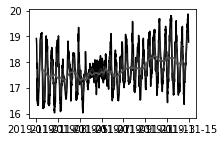

In [50]:
fig,axes = plt.subplots(figsize=(3,2))

axes.plot(time,temp,color='k')
axes.plot(time,temp_filt_6hr_ave,color='#252525')
axes.plot(time,temp_filt_24hr_ave,color='#525252')
plt.show()

### Step 3: Set the figure size
The figure size argument here is a tuple (tuples are a data format in Python where) of (width, height) in inches. Setting this manually allows you to pre-size you figure so that it is the right size for the document you are producing. An A4 page is 8.27 x 11.69 inches, so we will set our figure size to be 7 x 4.5 inches. A good rule of thumb is for the figure dimensions to have a ratio of 1.5:1 (width:height) or so.

_Python Definition - Tuple : A tuple" is a collection which is ordered and unchangeable. In Python tuples are written with round brackets._

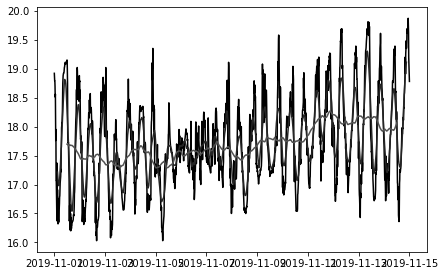

In [51]:
fig,axes = plt.subplots(figsize=(7,4.5)) # figsize was changed from 3,2 to 7,4.5

axes.plot(time,temp,color='k')
axes.plot(time,temp_filt_6hr_ave,color='#252525')
axes.plot(time,temp_filt_24hr_ave,color='#525252')
plt.show()

### Step 4: Labelling Data
Now we need to make sure we understand what is plotted so we can interpret the plot. To do this we will need to label each axis and label each line.


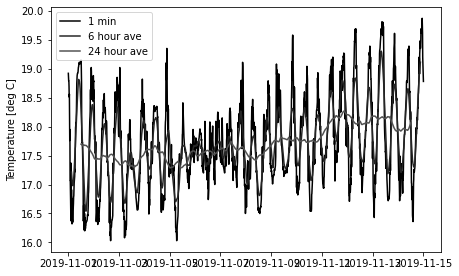

In [52]:
fig,axes = plt.subplots(figsize=(7,4.5)) # figsize was changed from 3,2 to 7,4.5

axes.plot(time,temp,color='k',label='1 min') # Added a label
axes.plot(time,temp_filt_6hr_ave,color='#252525',label='6 hour ave')
axes.plot(time,temp_filt_24hr_ave,color='#525252',label='24 hour ave')

axes.set_ylabel('Temperature [deg C]') # Added a y-axis label
axes.legend(loc='upper left') # Added a legend

plt.show()

### Step 5: Make sure everything is legible
From the previous plot we can see that the time values on the x-axis are not legible. There are a multiple options to fix this. We can rotate the labels, we can make the font smaller, we can make the figure larger or we can change the format of the labels and how often the ticks are plotted. Since we have already decided our figure size, we will cant change that. Let us try the other options.

First we will rotate the labels.

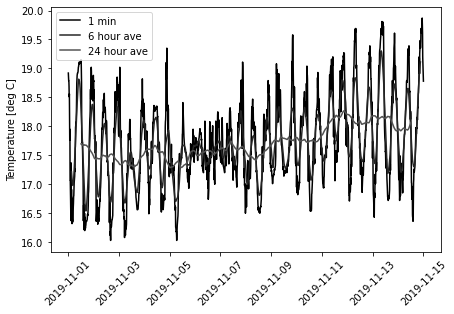

In [53]:
fig,axes = plt.subplots(figsize=(7,4.5)) # figsize was changed from 3,2 to 7,4.5

axes.plot(time,temp,color='k',label='1 min') # Added a label
axes.plot(time,temp_filt_6hr_ave,color='#252525',label='6 hour ave')
axes.plot(time,temp_filt_24hr_ave,color='#525252',label='24 hour ave')

axes.set_ylabel('Temperature [deg C]') # Added a y-axis label
axes.legend(loc='upper left') # Added a legend

axes.tick_params(axis='x',labelrotation=45) # Rotated the x-axis label

plt.show()

Then lets try making the text smaller instead

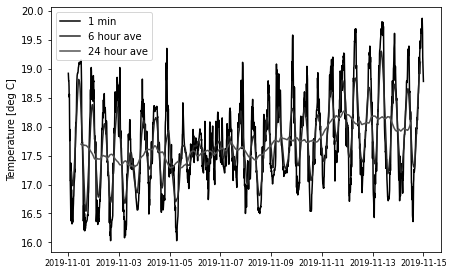

In [54]:
fig,axes = plt.subplots(figsize=(7,4.5)) # figsize was changed from 3,2 to 7,4.5

axes.plot(time,temp,color='k',label='1 min') # Added a label
axes.plot(time,temp_filt_6hr_ave,color='#252525',label='6 hour ave')
axes.plot(time,temp_filt_24hr_ave,color='#525252',label='24 hour ave')

axes.set_ylabel('Temperature [deg C]') # Added a y-axis label
axes.legend(loc='upper left') # Added a legend

axes.tick_params(axis='x',labelsize=8) # Rotated the x-axis label

plt.show()

Ok now it is legible, but it is a bit small. Lets try changing the format of the labels and how often the ticks are plotted. Now we have used the name of the month instead of the number to avoid ambiguity and we have plotted the ticks every 3 days.

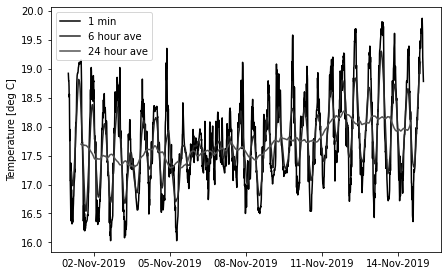

In [55]:
fig,axes = plt.subplots(figsize=(7,4.5)) # figsize was changed from 3,2 to 6,4

axes.plot(time,temp,color='k',label='1 min') # Added a label
axes.plot(time,temp_filt_6hr_ave,color='#252525',label='6 hour ave')
axes.plot(time,temp_filt_24hr_ave,color='#525252',label='24 hour ave')

axes.set_ylabel('Temperature [deg C]') # Added a y-axis label
axes.legend(loc='upper left') # Added a legend

axes.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y')) # this is called a date format string
axes.xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.show()

Lets stick with the last one, none of the above are neccesarily wrong though.

### Step 6: Emphasize the data you want to communicate

Recall we wanted to investigate the spring-neap variability (14 day) of temperature data collected by the ADCP we looked at in the first tutorial. Here we have three lines plotted, all of which are a similar colour. So its difficult to distinguish between them. We can fix this by cahnging the colour of the lines, the style of the lines, and their opacity (called alpha in matplotlib). Since we want to emphasize the spring-neap variability, we will make the 24 hour average lines thicker and more opaque, and the other lines lighter and thinner.

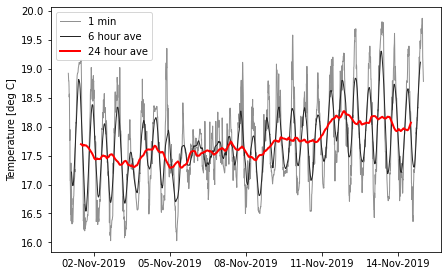

In [66]:
fig,axes = plt.subplots(figsize=(7,4.5)) # figsize was changed from 3,2 to 6,4

axes.plot(time,temp,color='#252525',label='1 min',lw=1,alpha=0.5) # Added a label
axes.plot(time,temp_filt_6hr_ave,color='#252525',label='6 hour ave',lw=1,alpha=1)
axes.plot(time,temp_filt_24hr_ave,c='red',label='24 hour ave',lw=2)

axes.set_ylabel('Temperature [deg C]') # Added a y-axis label
axes.legend(loc='upper left') 

axes.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y')) # this is called a date format string
axes.xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.show()

Now its starting to become clear what we want to emphasize. A plot that looks like this would often suffice. But we can do better than satisfactory.

### Step 7 (BONUS Step): Become nitpicky
We established that we want to study the spring-neap variability, so what functions do the 1 minute data and the 6 hour data serve?

These are classic examples of what we would call "chart junk", things that we plot that dont further the analysis we are trying to conduct. Lets simplify the plot to just the neccesary data. Now we dont need the legend either, lets add a title and remove the legend. We can also add a grid to the plot to make it easier to read, but lets make the lines thin and light so they dont distract from the data.

We can also use "latex" to add symbols to our plot. This is a bit more advanced, but it is a good skill to have. You can implement latex in your plots by using the dollar sign $ to indicate the start and end of the latex code. For example, lets add a degree symbol a superscript circle to the y-axis label. You can find a list of latex symbols here: https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols

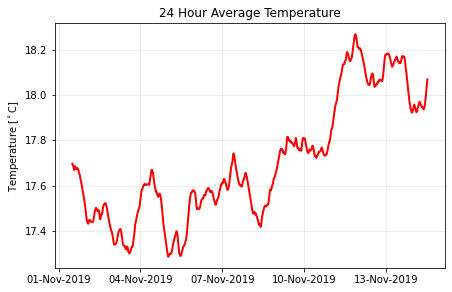

In [67]:
fig,axes = plt.subplots(figsize=(7,4.5)) # figsize was changed from 3,2 to 6,4

axes.plot(time,temp_filt_24hr_ave,c='red',label='24 hour ave',lw=2)

axes.set_ylabel(r'Temperature [$^\circ$C]') # Added a y-axis label
axes.set_title('24 Hour Average Temperature') 

axes.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y')) # this is called a date format string
axes.xaxis.set_major_locator(mdates.DayLocator(interval=3))

axes.grid(lw=0.5,c='#bdbdbd',alpha=0.5)

plt.show()

Or you might drop the title and add a caption instead. This is a good option if you are producing a document that will be printed and you want to save space. I also like to set the font size in the figure to match the font size in the document I am producing. But this is only worthwhile if you dont resize the figure in the document by dragging the corners.

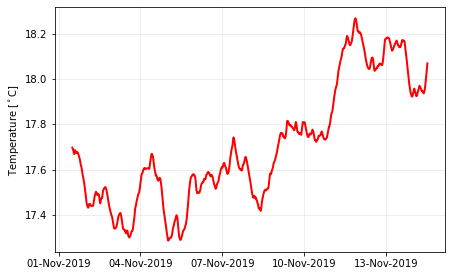

In [85]:
fig,axes = plt.subplots(figsize=(7,4.5)) # figsize was changed from 3,2 to 6,4
plt.rcParams['font.size'] = 10
axes.plot(time,temp_filt_24hr_ave,c='red',label='24 hour ave',lw=2)

axes.set_ylabel(r'Temperature [$^\circ$C]') # Added a y-axis label

axes.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y')) # this is called a date format string
axes.xaxis.set_major_locator(mdates.DayLocator(interval=3))

axes.grid(lw=0.5,c='#bdbdbd',alpha=0.5)


plt.show()

Lets look how far we have come:

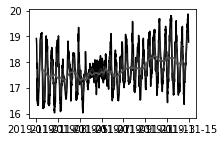

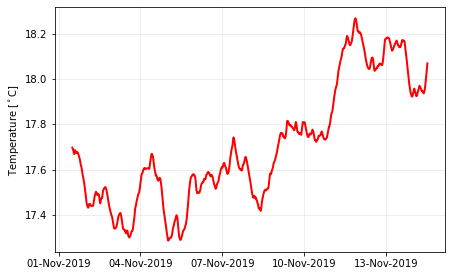

In [86]:
fig,axes = plt.subplots(figsize=(3,2))

axes.plot(time,temp,color='k')
axes.plot(time,temp_filt_6hr_ave,color='#252525')
axes.plot(time,temp_filt_24hr_ave,color='#525252')
plt.show()

fig,axes = plt.subplots(figsize=(7,4.5)) # figsize was changed from 3,2 to 6,4
plt.rcParams['font.size'] = 10
axes.plot(time,temp_filt_24hr_ave,c='red',label='24 hour ave',lw=2)

axes.set_ylabel(r'Temperature [$^\circ$C]') # Added a y-axis label

axes.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y')) # this is called a date format string
axes.xaxis.set_major_locator(mdates.DayLocator(interval=3))

axes.grid(lw=0.5,c='#bdbdbd',alpha=0.5)


plt.show()

Here is a checklist that you can use to make sure your plots meet the requirements for this plot.

## Checklist:
- Does my plot have a reason to exist?
     - What am I trying to communicate?
     - How can I best communicate this? (e.g. line plot, bar plot, scatter plot, etc.)
- Are the key elements of the plot reasonable?
     - Is the figure size appropriate?
     - Are the axes labelled? Are the units clear?
     - Are the lines labelled?
     - Are the labels legible?
     - Are the lines the right colour, style, and opacity?
     - Is the plot title appropriate?
- Is it possible to interpret the plot without prior knowledge?
     - Assume whoever looks at your plot doesnt read the accompanying text 
- Do I have any chart junk?
     - Is there anything that doesnt further the analysis?
     - Is there anything that is distracting?
